In [21]:
import matplotlib.pyplot as plt

In [39]:
import numpy as np

N = 100
D = 2

X = np.random.randn(N, D)

In [40]:
X[:50, :] = X[:50, :] - 2 * np.ones((50, D))
X[50:, :] = X[50:, :] + 2 * np.ones((50, D))

T = np.array([0] * 50 + [1] * 50)

In [41]:
ones = np.array([[1] * N]).T
Xb = np.concatenate((ones, X), axis=1)


In [42]:
# random assign weights
w = np.random.randn(D + 1)

# calculate the model output
Z = Xb.dot(w)

In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [44]:
Y = sigmoid(Z)

In [45]:
def cross_entropy(T, Y):
    E = 0
    for i in range(N):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

print(cross_entropy(T, Y))

31.547480407077966


In [46]:
w2 = np.array([0, 4, 4])

In [47]:
z2 = Xb.dot(w2)

Y2 = sigmoid(z2)

cross_entropy(T, Y2)

1.0251794017037312

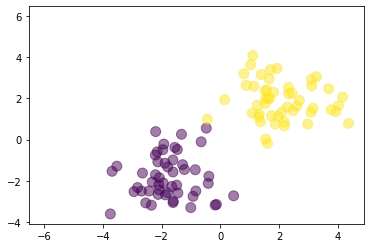

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, -6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()

### Gradient Descent

In [53]:
w

array([ 2.08077667, 17.34011295, 13.68026368])

In [54]:
learning_rate = 0.1
for i in range(100):
    if i % 10 == 0:
        print(cross_entropy(T, Y))
    
    w += learning_rate * np.dot((T - Y).T, Xb)
    Y = sigmoid(Xb.dot(w))
    
print(w)

1.5522010858860882
0.8297704004302454
0.4862667137430176
0.32485732164308856
0.2409016209143607
0.19267161587254064
0.1628446166529437
0.143416363158528
0.13029022762896483
0.12118468584137579
[-0.31790033 18.50175436 12.39480921]
